# Classification Project

### 1. Importing Packages

In [99]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

In [100]:
sns.set(style="whitegrid")

### 2. Load Dataset

In [101]:
train_df = pd.read_csv(r'C:\Users\F8874363\Downloads\train.csv')
test_df = pd.read_csv(r'C:\Users\F8874363\Downloads\test.csv')

### 3. Data Cleaning

In [102]:
# Drop duplicates
train_df.drop_duplicates(inplace=True)

In [103]:
# Drop rows with missing target or key text fields
train_df.dropna(subset=['headlines', 'description', 'content', 'category'], inplace=True)


In [104]:
# Combine text fields into a single feature
train_df['text'] = train_df['headlines'].fillna('') + ' ' + \
                   train_df['description'].fillna('') + ' ' + \
                   train_df['content'].fillna('')

In [105]:
# Clean text: lowercase, remove punctuation and numbers
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)  # keep only alphabets and space
    text = re.sub(r'\s+', ' ', text)  # collapse multiple spaces
    return text.strip()

train_df['text'] = train_df['text'].apply(clean_text)


In [106]:
# Encode target labels
label_encoder = LabelEncoder()
train_df['label'] = label_encoder.fit_transform(train_df['category'])


In [107]:
train_df

,headlines,description,content,url,category,text,label
0,RBI revises definition of politically-exposed ...,The central bank has also asked chairpersons a...,The Reserve Bank of India (RBI) has changed th...,https://indianexpress.com/article/business/ban...,business,rbi revises definition of politicallyexposed p...,0
1,NDTV Q2 net profit falls 57.4% to Rs 5.55 cror...,NDTV's consolidated revenue from operations wa...,Broadcaster New Delhi Television Ltd on Monday...,https://indianexpress.com/article/business/com...,business,ndtv q net profit falls to rs crore impacted b...,0
2,"Akasa Air ‘well capitalised’, can grow much fa...",The initial share sale will be open for public...,Homegrown server maker Netweb Technologies Ind...,https://indianexpress.com/article/business/mar...,business,akasa air well capitalised can grow much faste...,0
3,India’s current account deficit declines sharp...,The current account deficit (CAD) was 3.8 per ...,India’s current account deficit declined sharp...,https://indianexpress.com/article/business/eco...,business,indias current account deficit declines sharpl...,0
4,"States borrowing cost soars to 7.68%, highest ...",The prices shot up reflecting the overall high...,States have been forced to pay through their n...,https://indianexpress.com/article/business/eco...,business,states borrowing cost soars to highest so far ...,0
...,...,...,...,...,...,...,...
5515,"Samsung sends out invites for ‘Unpacked 2024’,...",Samsung is most likely to announce next-genera...,Samsung plans to reveal the next-generation fl...,https://indianexpress.com/article/technology/t...,technology,samsung sends out invites for unpacked new gal...,4
5516,Google Pixel 8 Pro accidentally appears on off...,The Pixel 8 Pro will most likely carry over it...,Google once again accidentally gave us a glimp...,https://indianexpress.com/article/technology/m...,technology,google pixel pro accidentally appears on offic...,4
5517,Amazon ad on Google Search redirects users to ...,Clicking on the real looking Amazon ad will op...,A new scam seems to be making rounds on the in...,https://indianexpress.com/article/technology/t...,technology,amazon ad on google search redirects users to ...,4
5518,"Elon Musk’s X, previously Twitter, now worth l...","Elon Musk's X, formerly Twitter, has lost more...",More than a year after Elon Musk acquired Twit...,https://indianexpress.com/article/technology/s...,technology,elon musks x previously twitter now worth less...,4


### 4. Data Preparation

In [108]:
X_train, X_val, y_train, y_val = train_test_split(
    train_df['text'], train_df['label'], test_size=0.2, random_state=42)

In [109]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)

### 5. Model Training

In [110]:
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

### 6. Model Evaluation

In [111]:
y_pred = model.predict(X_val_tfidf)
accuracy = accuracy_score(y_val, y_pred)
report = classification_report(y_val, y_pred, target_names=label_encoder.classes_)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)

Accuracy: 0.9773550724637681

Classification Report:
                precision    recall  f1-score   support

     business       0.98      0.96      0.97       245
    education       0.99      0.99      0.99       274
entertainment       0.97      0.99      0.98       178
       sports       0.98      0.99      0.98       137
   technology       0.97      0.97      0.97       270

     accuracy                           0.98      1104
    macro avg       0.98      0.98      0.98      1104
 weighted avg       0.98      0.98      0.98      1104



### 7. Visualizations

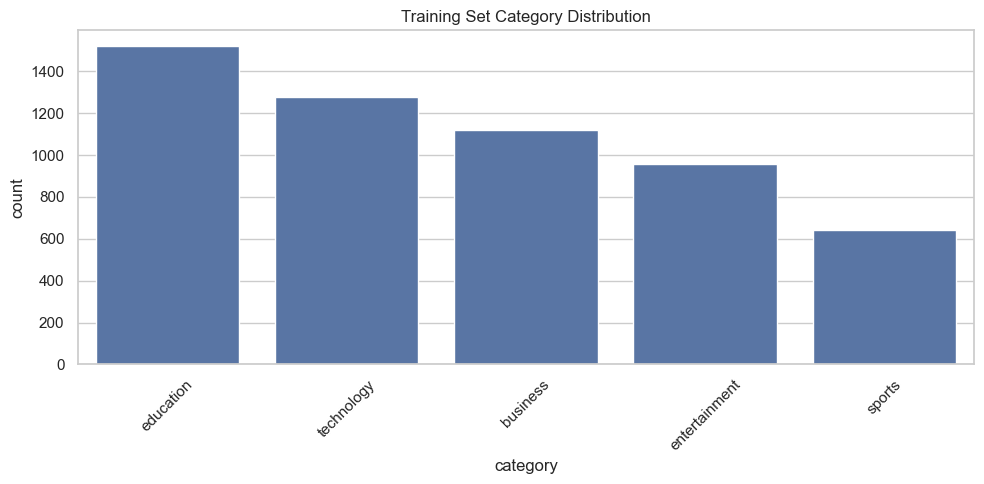

In [112]:
# A. Category Distribution
plt.figure(figsize=(10, 5))
sns.countplot(data=train_df, x='category', order=train_df['category'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Training Set Category Distribution')
plt.tight_layout()
plt.show()

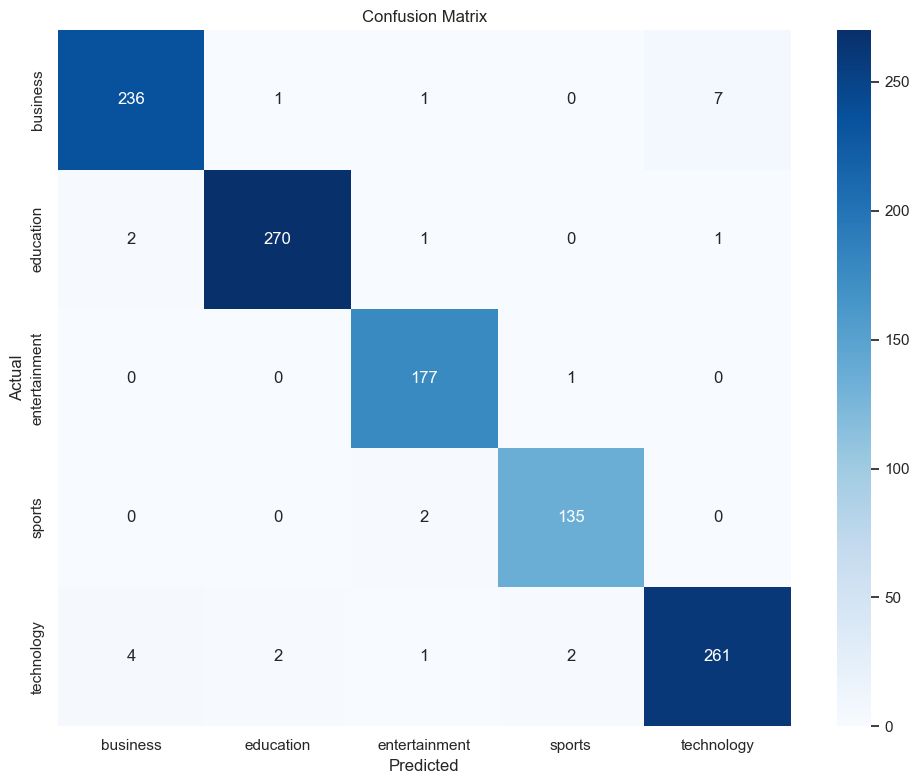

In [113]:
# B. Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

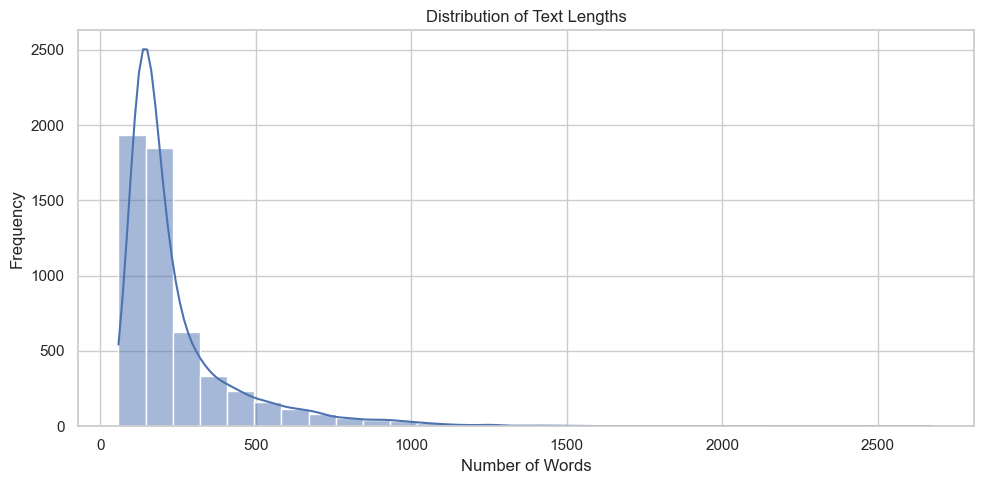

In [114]:
# C. Text Length Distribution
train_df['text_length'] = train_df['text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 5))
sns.histplot(train_df['text_length'], bins=30, kde=True)
plt.title('Distribution of Text Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

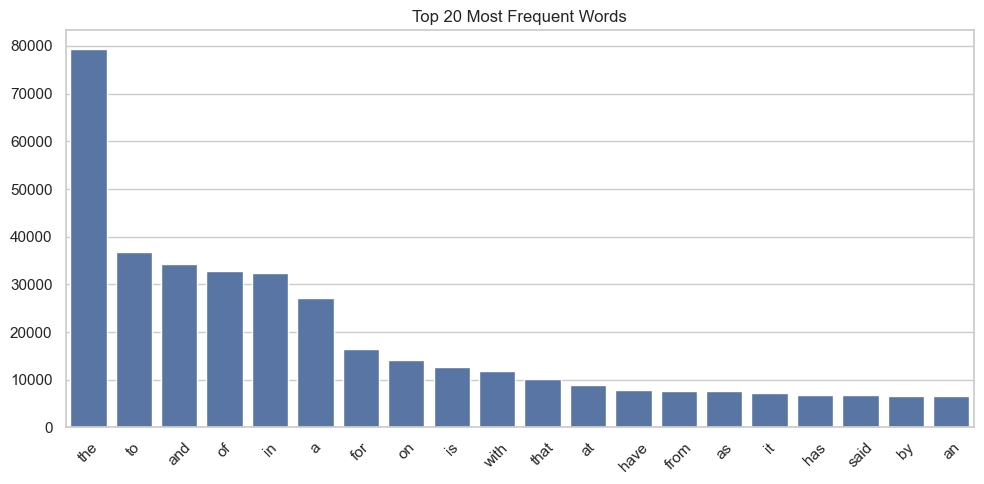

In [115]:
# D. Top 20 Most Frequent Words (raw text)
all_words = ' '.join(train_df['text']).split()
word_freq = Counter(all_words)
common_words = word_freq.most_common(20)

words, freqs = zip(*common_words)
plt.figure(figsize=(10, 5))
sns.barplot(x=list(words), y=list(freqs))
plt.xticks(rotation=45)
plt.title('Top 20 Most Frequent Words')
plt.tight_layout()
plt.show()